In [1]:
#Import Dependencies
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as stats

In [2]:
# Reading and cleaning "Human Development Index" Data
humanDevIndex=pd.read_csv("Resources/HumanDevelopmentIndex.csv")

# Replace nan's with zero:
humanDevIndex=humanDevIndex.fillna(0)

# Rename column "Country" to match with other dataset, which will help with 'merge'
humanDevIndex=humanDevIndex.rename(columns={"Country":"Country Name"})

# Changing the number format to 'float'
humanDevIndex=humanDevIndex.iloc[:,0:28]
humanDevIndex.iloc[:,2:28]=humanDevIndex.iloc[:,2:28].astype(float)
for i in range(2,28):
    humanDevIndex.iloc[:,i]=humanDevIndex.iloc[:,i].map("{:.2f}".format)

humanDevIndex.head()

,HDI Rank (2018),Country Name,1990,1991,1992,1993,1994,1995,1996,1997,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,170,Afghanistan,0.30,0.30,0.31,0.31,0.30,0.33,0.33,0.34,...,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.48,0.49,0.49
1,69,Albania,0.64,0.62,0.61,0.61,0.62,0.63,0.64,0.64,...,0.71,0.72,0.72,0.73,0.74,0.76,0.77,0.78,0.79,0.79
2,82,Algeria,0.58,0.58,0.59,0.59,0.60,0.60,0.61,0.62,...,0.70,0.71,0.71,0.72,0.73,0.74,0.74,0.75,0.75,0.75
3,36,Andorra,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.83,0.83,0.83,0.83,0.83,0.83,0.85,0.85,0.85,0.85
4,149,Angola,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.47,0.48,0.49,0.51,0.51,0.53,0.54,0.55,0.56,0.56


In [3]:
# Number of countries in 'Human Development Index' dataset
humanDevIndex["Country Name"].count()

189

In [4]:
# Reading "Energy Consumption" Data
energyCons=pd.read_csv("Resources/TheWorldBank/EnergyConsumption.csv")

# Replace nan's with zero:
energyCons=energyCons.fillna(0)

# Rename year columns for a cleaner look
energyCons=energyCons.iloc[:,2:30]
rename_map = {}
for columns in energyCons.columns:
    if '[' in columns:
         rename_map[columns] = columns.split()[0]
energyCons=energyCons.rename(columns=rename_map)

# Change the number format to float
#energyCons=energyCons.dropna(how='any')
energyCons.dtypes
energyCons.iloc[:,2:28]=energyCons.iloc[:,2:28].astype(float)
for i in range(2,28):
    energyCons.iloc[:,i]=energyCons.iloc[:,i].map("{:.2f}".format)

energyCons.head()

,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,AFG,15.92,17.04,26.52,30.59,32.80,35.08,37.95,41.43,...,37.14,33.86,21.34,17.81,14.84,11.48,13.97,16.33,19.31,18.42
1,Albania,ALB,25.52,33.00,46.81,51.15,51.46,50.61,51.64,55.95,...,31.71,32.10,35.91,37.22,37.12,35.96,40.05,41.29,38.69,38.62
2,Algeria,DZA,0.18,0.32,0.29,0.48,0.40,0.42,0.39,0.47,...,0.41,0.41,0.30,0.31,0.26,0.18,0.19,0.14,0.07,0.06
3,American Samoa,ASM,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.70,0.70,0.70,0.89
4,Andorra,AND,14.27,14.27,14.31,13.92,14.56,14.48,14.10,14.19,...,17.49,16.94,17.42,17.52,19.09,18.97,19.20,19.56,19.89,19.75


In [5]:
# Number of countries in 'Energy Consumption' dataset
energyCons["Country Name"].count()

263

In [6]:
# Merging two datasets
# Columns with HDI: Human Development Index
# Columns with RE: Renewable Energy Consumption Rate
merged_df=pd.merge(humanDevIndex,energyCons,on="Country Name",how='outer',suffixes=("_HDI","_RE"))
merged_df=merged_df.dropna(how='any')
merged_df.head()

,HDI Rank (2018),Country Name,1990_HDI,1991_HDI,1992_HDI,1993_HDI,1994_HDI,1995_HDI,1996_HDI,1997_HDI,...,2006_RE,2007_RE,2008_RE,2009_RE,2010_RE,2011_RE,2012_RE,2013_RE,2014_RE,2015_RE
0,170.0,Afghanistan,0.30,0.30,0.31,0.31,0.30,0.33,0.33,0.34,...,37.14,33.86,21.34,17.81,14.84,11.48,13.97,16.33,19.31,18.42
1,69.0,Albania,0.64,0.62,0.61,0.61,0.62,0.63,0.64,0.64,...,31.71,32.10,35.91,37.22,37.12,35.96,40.05,41.29,38.69,38.62
2,82.0,Algeria,0.58,0.58,0.59,0.59,0.60,0.60,0.61,0.62,...,0.41,0.41,0.30,0.31,0.26,0.18,0.19,0.14,0.07,0.06
3,36.0,Andorra,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,17.49,16.94,17.42,17.52,19.09,18.97,19.20,19.56,19.89,19.75
4,149.0,Angola,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,65.02,61.60,58.11,55.75,54.19,52.72,52.25,50.69,50.80,49.57


In [7]:
# Number of countries in the merged dataset
merged_df["Country Name"].count()

164

In [8]:
# Drop NAs and remove column "Country Code"
merged_df=merged_df.dropna(how='any')
del merged_df["Country Code"]

In [9]:
# Remove the row with an error
merged_df=merged_df.drop([33],axis=0)

In [10]:
# Make sure all of the numbers are in float format
merged_df.iloc[:,2:52]=merged_df.iloc[:,2:52].astype(float)

In [11]:
# Show the columns
merged_df.columns

Index(['HDI Rank (2018)', 'Country Name', '1990_HDI', '1991_HDI', '1992_HDI',
       '1993_HDI', '1994_HDI', '1995_HDI', '1996_HDI', '1997_HDI', '1998_HDI',
       '1999_HDI', '2000_HDI', '2001_HDI', '2002_HDI', '2003_HDI', '2004_HDI',
       '2005_HDI', '2006_HDI', '2007_HDI', '2008_HDI', '2009_HDI', '2010_HDI',
       '2011_HDI', '2012_HDI', '2013_HDI', '2014_HDI', '2015_HDI', '1990_RE',
       '1991_RE', '1992_RE', '1993_RE', '1994_RE', '1995_RE', '1996_RE',
       '1997_RE', '1998_RE', '1999_RE', '2000_RE', '2001_RE', '2002_RE',
       '2003_RE', '2004_RE', '2005_RE', '2006_RE', '2007_RE', '2008_RE',
       '2009_RE', '2010_RE', '2011_RE', '2012_RE', '2013_RE', '2014_RE',
       '2015_RE'],
      dtype='object')

In [12]:
# Create two new columns, which calculates avg HDI index and energy consumption for each countries
merged_df["Avg HDI"]=merged_df.iloc[:,2:27].mean(axis=1)
merged_df["Avg Energy Consumption"]=merged_df.iloc[:,28:52].mean(axis=1)
merged_df["Total Energy Consumption"]=merged_df.iloc[:,28:52].sum(axis=1)

In [13]:
# Grouping HDIs into 4 groups: Low, Medium, High and Very High Human Development:
    # HDI of less than 0.550 for low human development, 
    # 0.550–0.699 for medium human development, 
    # 0.700–0.799 for high human development 
    # and 0.800 or greater for very high human development.

# Creating a column "Development" to segment countries by their development level:
# Creating bins and labels for each segments
bins=[0,0.549,0.699,0.799,1]
labels=["Low Human Development","Medium Human Development", "High Human Development","Very High Human Development"]
merged_df["Development"]=pd.cut(merged_df["Avg HDI"],bins,labels=labels)

In [14]:
# Final version of out dataset
merged_df.head()

,HDI Rank (2018),Country Name,1990_HDI,1991_HDI,1992_HDI,1993_HDI,1994_HDI,1995_HDI,1996_HDI,1997_HDI,...,2010_RE,2011_RE,2012_RE,2013_RE,2014_RE,2015_RE,Avg HDI,Avg Energy Consumption,Total Energy Consumption,Development
0,170.0,Afghanistan,0.30,0.30,0.31,0.31,0.30,0.33,0.33,0.34,...,14.84,11.48,13.97,16.33,19.31,18.42,0.3836,32.726250,785.43,Low Human Development
1,69.0,Albania,0.64,0.62,0.61,0.61,0.62,0.63,0.64,0.64,...,37.12,35.96,40.05,41.29,38.69,38.62,0.6856,40.551667,973.24,Medium Human Development
2,82.0,Algeria,0.58,0.58,0.59,0.59,0.60,0.60,0.61,0.62,...,0.26,0.18,0.19,0.14,0.07,0.06,0.6652,0.377500,9.06,Medium Human Development
3,36.0,Andorra,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,19.09,18.97,19.20,19.56,19.89,19.75,0.4924,16.119167,386.86,Low Human Development
4,149.0,Angola,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,54.19,52.72,52.25,50.69,50.80,49.57,0.3020,66.917083,1606.01,Low Human Development


In [17]:
# Create a summary table to understand the data structure
summary_table=pd.DataFrame({"Number of countries":merged_df.groupby("Development")["Country Name"].nunique(),
"Avg HDI":merged_df.groupby("Development")["Avg HDI"].mean(),
"Avg Energy Consumption":merged_df.groupby("Development")["Total Energy Consumption"].mean(),
"Total Energy Consumption":merged_df.groupby("Development")["Total Energy Consumption"].sum()}).reset_index()
summary_table["Total Energy Consumption"]=summary_table["Total Energy Consumption"].map("{:.0f}".format)
summary_table["Avg Energy Consumption"]=summary_table["Avg Energy Consumption"].map("{:.0f}".format)
summary_table["Avg HDI"]=summary_table["Avg HDI"].map("{:.2f}".format)
summary_table

,Development,Number of countries,Avg HDI,Avg Energy Consumption,Total Energy Consumption
0,Low Human Development,67,0.37,1226,82147
1,Medium Human Development,37,0.64,757,27991
2,High Human Development,29,0.75,331,9598
3,Very High Human Development,29,0.85,331,9607


In [38]:
# Stats for renewable energy consumption by development segments
RE_summary_table=pd.DataFrame({"Avg Energy Consumption":merged_df.groupby("Development")["Total Energy Consumption"].mean(),
"Median Energy Consumption":merged_df.groupby("Development")["Total Energy Consumption"].median(),                            
"Var Energy Consumption":merged_df.groupby("Development")["Total Energy Consumption"].agg(np.var),
"Std Energy Consumption":merged_df.groupby("Development")["Total Energy Consumption"].agg(np.std),
"Total Energy Consumption":merged_df.groupby("Development")["Total Energy Consumption"].sum()}).reset_index()
RE_summary_table["Total Energy Consumption"]=RE_summary_table["Total Energy Consumption"].map("{:.0f}".format)
RE_summary_table["Avg Energy Consumption"]=RE_summary_table["Avg Energy Consumption"].map("{:.0f}".format)
RE_summary_table

,Development,Avg Energy Consumption,Median Energy Consumption,Var Energy Consumption,Std Energy Consumption,Total Energy Consumption
0,Low Human Development,1226,1283.89,626874.991004,791.754375,82147
1,Medium Human Development,757,750.95,264173.052221,513.977677,27991
2,High Human Development,331,243.71,99370.795217,315.231336,9598
3,Very High Human Development,331,177.11,157914.497661,397.384571,9607


In [39]:
# Stats for total renewable energy consumption
RE_summary_table_total=pd.DataFrame({"Avg Energy Consumption":merged_df["Total Energy Consumption"].mean(),
"Median Energy Consumption":merged_df["Total Energy Consumption"].median(),                            
"Var Energy Consumption":merged_df["Total Energy Consumption"].agg(np.var),
"Std Energy Consumption":merged_df["Total Energy Consumption"].agg(np.std),
"Total Energy Consumption":merged_df["Total Energy Consumption"].sum()}, index=[0])

RE_summary_table_total

,Avg Energy Consumption,Median Energy Consumption,Var Energy Consumption,Std Energy Consumption,Total Energy Consumption
0,795.84,570.67,513872.300163,716.848868,129721.92


In [40]:
# Stats for human development index by development segments
HDI_summary_table=pd.DataFrame({"Avg HDI":merged_df.groupby("Development")["Avg HDI"].mean(),
"Median HDI":merged_df.groupby("Development")["Avg HDI"].median(),                            
"Var HDI":merged_df.groupby("Development")["Avg HDI"].agg(np.var),
"Std HDI":merged_df.groupby("Development")["Avg HDI"].agg(np.std)}).reset_index()
HDI_summary_table

,Development,Avg HDI,Median HDI,Var HDI,Std HDI
0,Low Human Development,0.374836,0.3836,0.010543,0.102678
1,Medium Human Development,0.637481,0.6524,0.001941,0.044058
2,High Human Development,0.748152,0.7452,0.000838,0.028955
3,Very High Human Development,0.853766,0.8568,0.000862,0.029358


In [41]:
# Stats for total human development index
HDI_summary_table_total=pd.DataFrame({"Avg HDI":merged_df["Avg HDI"].mean(),
"Median HDI":merged_df["Avg HDI"].median(),                            
"Var HDI":merged_df["Avg HDI"].agg(np.var),
"Std HDI":merged_df["Avg HDI"].agg(np.std)}, index=[0])
HDI_summary_table_total

,Avg HDI,Median HDI,Var HDI,Std HDI
0,0.583782,0.6164,0.043724,0.209103


Correlation coefficient: -0.5106541612549699 



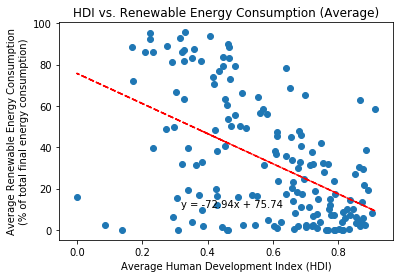

In [19]:
# Creating a scatter plot to see the relationship betweeen HDI and Renewable Energy Consumption:

# Creating labels and titles
plt.title("HDI vs. Renewable Energy Consumption (Average)")
plt.xlabel("Average Human Development Index (HDI)")
plt.ylabel(r"Average Renewable Energy Consumption" + "\n" + "(% of total final energy consumption)")

# Creating x and y axis
x_values = merged_df["Avg HDI"]
y_values = merged_df["Avg Energy Consumption"]

# Regression analysis
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r--")
plt.annotate(line_eq, (0.32, 11), fontsize = 10, color = "black")

print(f"Correlation coefficient: {rvalue} \n")

Correlation coefficient: -0.1326338076309433 



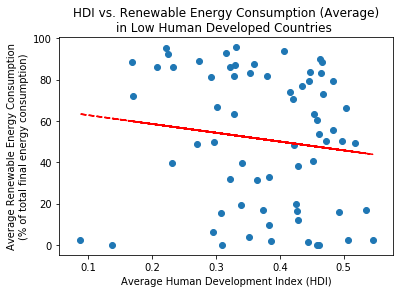

In [20]:
# Creating a scatter plot for each development segment to see the relationship betweeen HDI and Renewable Energy Consumption:

# Plot for "Low Human Developed Countries"

# Creating labels and titles
plt.title(r"HDI vs. Renewable Energy Consumption (Average)" + "\n" + "in Low Human Developed Countries ")
plt.xlabel("Average Human Development Index (HDI)")
plt.ylabel(r"Average Renewable Energy Consumption" + "\n" + "(% of total final energy consumption)")

# Creating x and y axis
x_values = merged_df["Avg HDI"].loc[merged_df["Development"]=="Low Human Development"]
y_values = merged_df["Avg Energy Consumption"].loc[merged_df["Development"]=="Low Human Development"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Regression analysis
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r--")

print(f"Correlation coefficient: {rvalue} \n")

Correlation coefficient: -0.15453830778305644 



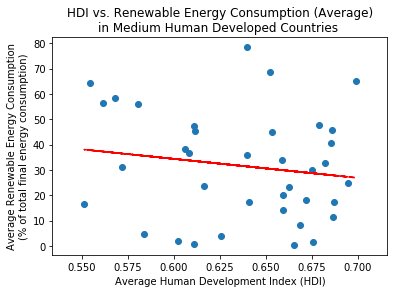

In [21]:
# Plot for "Medium Human Developed Countries"

# Creating labels and titles
plt.title(r"HDI vs. Renewable Energy Consumption (Average)" + "\n" + "in Medium Human Developed Countries ")
plt.xlabel("Average Human Development Index (HDI)")
plt.ylabel(r"Average Renewable Energy Consumption" + "\n" + "(% of total final energy consumption)")

# Creating x and y axis
x_values = merged_df["Avg HDI"].loc[merged_df["Development"]=="Medium Human Development"]
y_values = merged_df["Avg Energy Consumption"].loc[merged_df["Development"]=="Medium Human Development"]

# Regression analysis
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r--")

print(f"Correlation coefficient: {rvalue} \n")

Correlation coefficient: -0.06540311222389178 



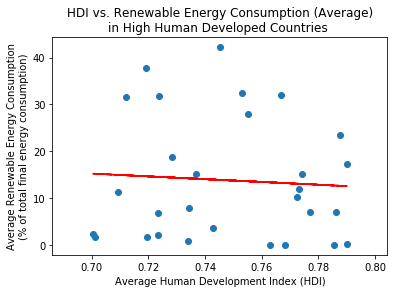

In [22]:
# Plot for "High Human Developed Countries"

# Creating labels and titles
plt.title(r"HDI vs. Renewable Energy Consumption (Average)" + "\n" + "in High Human Developed Countries ")
plt.xlabel("Average Human Development Index (HDI)")
plt.ylabel(r"Average Renewable Energy Consumption" + "\n" + "(% of total final energy consumption)")

# Creating x and y axis
x_values = merged_df["Avg HDI"].loc[merged_df["Development"]=="High Human Development"]
y_values = merged_df["Avg Energy Consumption"].loc[merged_df["Development"]=="High Human Development"]

# Regression analysis
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r--")
#plt.annotate(line_eq, (0.32, 11), fontsize = 10, color = "black")

print(f"Correlation coefficient: {rvalue} \n")

Correlation coefficient: 0.5047778851193632 



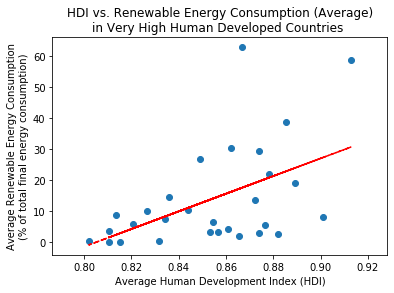

In [23]:
# Plot for "Very High Human Developed Countries"

# Creating labels and titles
plt.title(r"HDI vs. Renewable Energy Consumption (Average)" + "\n" + "in Very High Human Developed Countries ")
plt.xlabel("Average Human Development Index (HDI)")
plt.ylabel(r"Average Renewable Energy Consumption" + "\n" + "(% of total final energy consumption)")

# Creating x and y axis
x_values = merged_df["Avg HDI"].loc[merged_df["Development"]=="Very High Human Development"]
y_values = merged_df["Avg Energy Consumption"].loc[merged_df["Development"]=="Very High Human Development"]

# Regression analysis
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r--")
#plt.annotate(line_eq, (0.32, 11), fontsize = 10, color = "black")

print(f"Correlation coefficient: {rvalue} \n")

F_onewayResult(statistic=22.6523298314168, pvalue=2.981800677745281e-12)

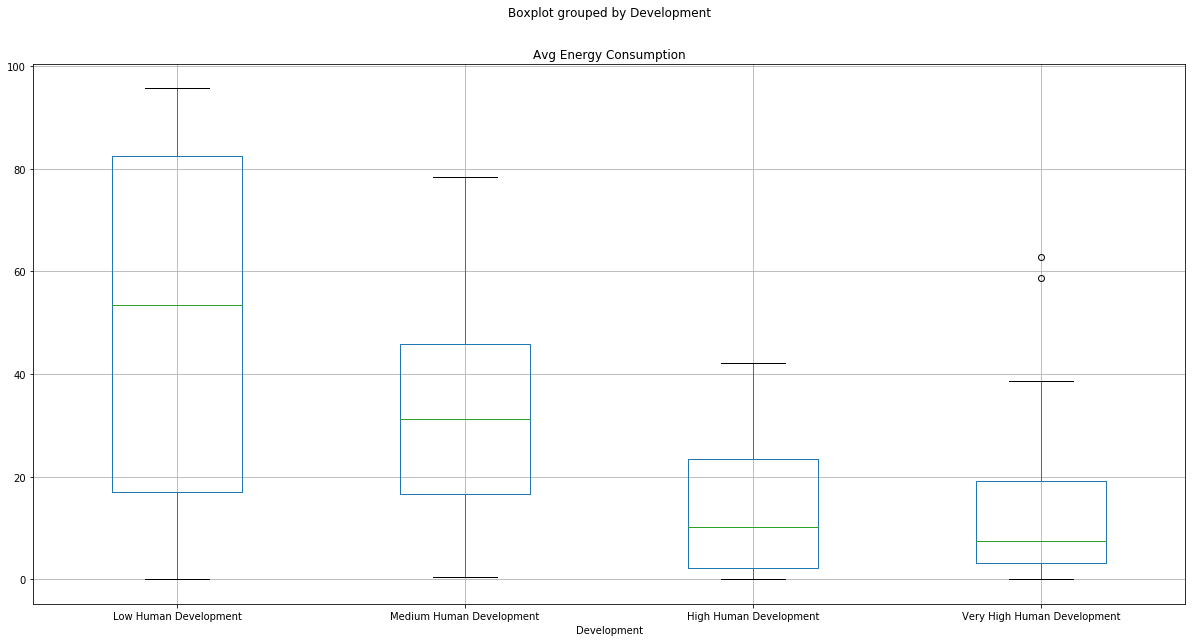

In [24]:
# Creating a boxplot for each segment:
merged_df.boxplot("Avg Energy Consumption", by="Development", figsize = (20,10))
group1 = merged_df.loc[merged_df["Development"]=="Low Human Development"]["Avg Energy Consumption"]
group2 = merged_df.loc[merged_df["Development"]=="Medium Human Development"]["Avg Energy Consumption"]
group3 = merged_df.loc[merged_df["Development"]=="High Human Development"]["Avg Energy Consumption"]
group4 = merged_df.loc[merged_df["Development"]=="Very High Human Development"]["Avg Energy Consumption"]

# Perform ANOVA to  test the validity of the null hypothesis which states a commonly accepted claim about a population. 
stats.f_oneway(group1,group2,group3,group4)

In [25]:
# Final version of our dataset
merged_df.head()

,HDI Rank (2018),Country Name,1990_HDI,1991_HDI,1992_HDI,1993_HDI,1994_HDI,1995_HDI,1996_HDI,1997_HDI,...,2010_RE,2011_RE,2012_RE,2013_RE,2014_RE,2015_RE,Avg HDI,Avg Energy Consumption,Total Energy Consumption,Development
0,170.0,Afghanistan,0.30,0.30,0.31,0.31,0.30,0.33,0.33,0.34,...,14.84,11.48,13.97,16.33,19.31,18.42,0.3836,32.726250,785.43,Low Human Development
1,69.0,Albania,0.64,0.62,0.61,0.61,0.62,0.63,0.64,0.64,...,37.12,35.96,40.05,41.29,38.69,38.62,0.6856,40.551667,973.24,Medium Human Development
2,82.0,Algeria,0.58,0.58,0.59,0.59,0.60,0.60,0.61,0.62,...,0.26,0.18,0.19,0.14,0.07,0.06,0.6652,0.377500,9.06,Medium Human Development
3,36.0,Andorra,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,19.09,18.97,19.20,19.56,19.89,19.75,0.4924,16.119167,386.86,Low Human Development
4,149.0,Angola,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,54.19,52.72,52.25,50.69,50.80,49.57,0.3020,66.917083,1606.01,Low Human Development


In [26]:
merged_df["Total HDI"]=merged_df.iloc[:,2:27].sum(axis=1)
#average 
merged_df["Avg Renewable Energy Share 2010-2015"]=merged_df.iloc[:,47:52].sum(axis=1)/5
merged_df["Avg Renewable Energy Share 2004-2009"]=merged_df.iloc[:,41:46].sum(axis=1)/5
#avg renewable energy share 2010-2015 -- avg reneweable energy share 2004-2009
merged_df["Renewable Energy Share Change 2004-2009 vs 2010-2015"]=merged_df.iloc[:,54]-(merged_df.iloc[:,41:46].sum(axis=1)/5)

merged_df["Total Energy Consumption"]=merged_df.iloc[:,28:52].sum(axis=1)
merged_df["Avg HDI"]=merged_df.iloc[:,2:27].mean(axis=1)
merged_df["Avg HDI 2004-2015"]=merged_df.iloc[:,16:27].mean(axis=1)
merged_df["Avg Energy Consumption"]=merged_df.iloc[:,28:52].mean(axis=1)

In [28]:
merged_df.head()

,HDI Rank (2018),Country Name,1990_HDI,1991_HDI,1992_HDI,1993_HDI,1994_HDI,1995_HDI,1996_HDI,1997_HDI,...,2015_RE,Avg HDI,Avg Energy Consumption,Total Energy Consumption,Development,Total HDI,Avg Renewable Energy Share 2010-2015,Avg Renewable Energy Share 2004-2009,Renewable Energy Share Change 2004-2009 vs 2010-2015,Avg HDI 2004-2015
0,170.0,Afghanistan,0.30,0.30,0.31,0.31,0.30,0.33,0.33,0.34,...,18.42,0.3836,32.726250,785.43,Low Human Development,9.59,14.886,40.796,-40.4124,0.448182
1,69.0,Albania,0.64,0.62,0.61,0.61,0.62,0.63,0.64,0.64,...,38.62,0.6856,40.551667,973.24,Medium Human Development,17.14,38.328,34.074,-33.3884,0.737273
2,82.0,Algeria,0.58,0.58,0.59,0.59,0.60,0.60,0.61,0.62,...,0.06,0.6652,0.377500,9.06,Medium Human Development,16.63,0.216,0.462,0.2032,0.720909
3,36.0,Andorra,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,19.75,0.4924,16.119167,386.86,Low Human Development,12.31,18.868,17.022,-16.5296,0.834545
4,149.0,Angola,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,49.57,0.3020,66.917083,1606.01,Low Human Development,7.55,53.120,66.074,-65.7720,0.502727


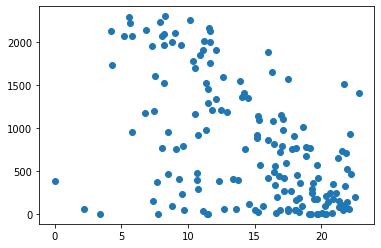

In [29]:
plt.scatter(merged_df["Total HDI"], merged_df["Total Energy Consumption"])

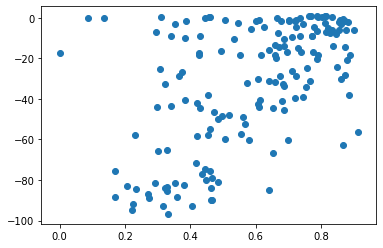

In [30]:
plt.scatter(merged_df["Avg HDI"], merged_df["Renewable Energy Share Change 2004-2009 vs 2010-2015"])

Text(0.32, 11, 'y = 114.6x + -109.46')

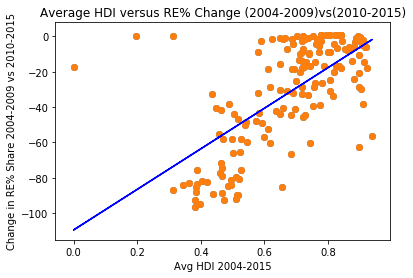

In [31]:
plt.scatter(merged_df["Avg HDI 2004-2015"], merged_df["Renewable Energy Share Change 2004-2009 vs 2010-2015"])
plt.title("Average HDI versus RE% Change (2004-2009)vs(2010-2015)")
plt.xlabel("Avg HDI 2004-2015")
plt.ylabel("Change in RE% Share 2004-2009 vs 2010-2015")

x_values = merged_df["Avg HDI 2004-2015"]
y_values = merged_df["Renewable Energy Share Change 2004-2009 vs 2010-2015"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "b")
plt.annotate(line_eq, (0.32, 11), fontsize = 10, color = "black")

In [43]:
new=merged_df.iloc[:,2:]
del new["Avg Energy Consumption"]
del new["Total Energy Consumption"]
del new["Avg HDI"]
new=new.set_index("Development")
new=new.groupby("Development").mean()
HDI_df=new.iloc[:,:24].T
RE_df=new.iloc[:,26:55].T

HDI_df.head()

Development,Low Human Development,Medium Human Development,High Human Development,Very High Human Development
1990_HDI,0.166567,0.565946,0.694138,0.795172
1991_HDI,0.168060,0.567297,0.694828,0.798966
1992_HDI,0.167313,0.570541,0.694828,0.773448
1993_HDI,0.169104,0.575135,0.696897,0.810000
1994_HDI,0.169851,0.579189,0.701379,0.818276


([<matplotlib.axis.XTick at 0x194db4c2e88>,
 <a list of 24 Text xticklabel objects>)

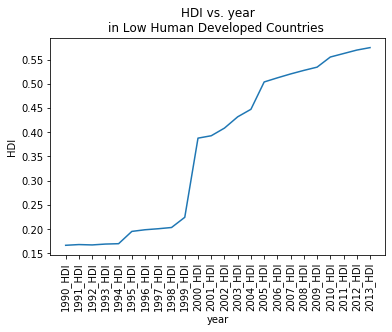

In [59]:
# HDI trend over years in "Low Human Developed Countries"

# Creating labels and titles
plt.title(r"HDI vs. year" + "\n" + "in Low Human Developed Countries ")
plt.xlabel("year")
plt.ylabel("HDI")


plt.plot(HDI_df.index,HDI_df["Low Human Development"])
plt.xticks(HDI_df.index,rotation=90)


([<matplotlib.axis.XTick at 0x194db563088>,
 <a list of 24 Text xticklabel objects>)

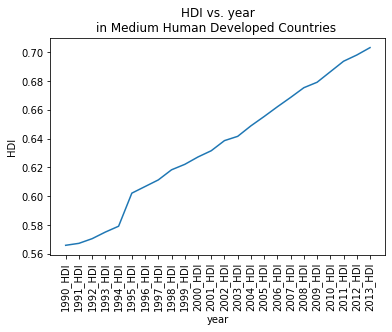

In [60]:
# HDI trend over years in "Medium Human Developed Countries"

# Creating labels and titles
plt.title(r"HDI vs. year" + "\n" + "in Medium Human Developed Countries ")
plt.xlabel("year")
plt.ylabel("HDI")

plt.plot(HDI_df.index,HDI_df["Medium Human Development"])
plt.xticks(HDI_df.index,rotation=90)

([<matplotlib.axis.XTick at 0x194db5ff908>,
 <a list of 24 Text xticklabel objects>)

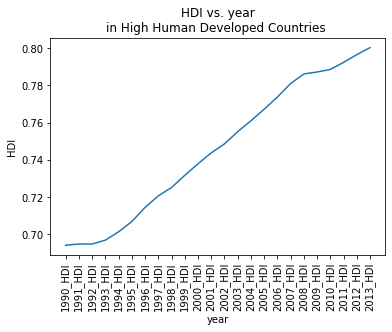

In [61]:
# HDI trend over years in "High Human Developed Countries"

# Creating labels and titles
plt.title(r"HDI vs. year" + "\n" + "in High Human Developed Countries ")
plt.xlabel("year")
plt.ylabel("HDI")

plt.plot(HDI_df.index,HDI_df["High Human Development"])
plt.xticks(HDI_df.index,rotation=90)

([<matplotlib.axis.XTick at 0x194db67e148>,
 <a list of 24 Text xticklabel objects>)

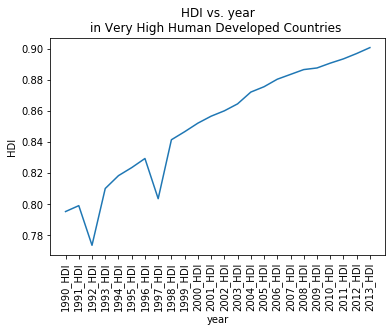

In [62]:
# HDI trend over years in "Very High Human Developed Countries"

# Creating labels and titles
plt.title(r"HDI vs. year" + "\n" + "in Very High Human Developed Countries ")
plt.xlabel("year")
plt.ylabel("HDI")

plt.plot(HDI_df.index,HDI_df["Very High Human Development"])
plt.xticks(HDI_df.index,rotation=90)